#### LightGBM with StandardScaler - Model selection

Training set size: 18792
Test set size: 4698
Training class distribution:
 performance_target
0    11315
1     7477
Name: count, dtype: int64
Test class distribution:
 performance_target
0    2829
1    1869
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 7477, number of negative: 11315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397882 -> initscore=-0.414298
[LightGBM] [Info] Start training from score -0.414298

🔹 LightGBM Accuracy: 0.7003


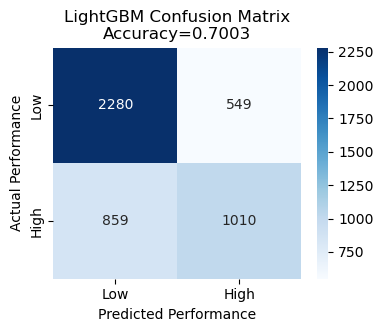


🔹 Top 10 Important Features:
                         Feature  Importance
0                    employee_id         765
6             avg_training_score         492
2                            age         391
3              length_of_service         337
52  recruitment_channel_sourcing          97
1                no_of_trainings          90
4                  KPIs_met >80%          85
50                      gender_m          47
11        department_Procurement          45
14         department_Technology          44


In [1]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier

# -------------------------------
# 2. Load Dataset
# -------------------------------
# Replace the path with your dataset location
df = pd.read_csv("C:\\Users\\Ant PC\\Downloads\\Test_data.csv")

# -------------------------------
# 3. Create Binary Target
# -------------------------------
# 1 = High Performance (rating >= 4), 0 = Low Performance (rating < 4)
df["performance_target"] = df["previous_year_rating"].apply(lambda x: 1 if x >= 4 else 0)

# -------------------------------
# 4. Define Features and Target
# -------------------------------
# Drop target and original rating to avoid leakage
X = df.drop(["performance_target", "previous_year_rating"], axis=1)
y = df["performance_target"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# -------------------------------
# 5. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing
    random_state=42,        # reproducibility
    stratify=y              # maintain class proportions
)

# Optional: check distribution
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Training class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

# -------------------------------
# 6. Scale Features
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 7. Train LightGBM
# -------------------------------
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_scaled, y_train)

# -------------------------------
# 8. Make Predictions
# -------------------------------
y_pred = lgb_model.predict(X_test_scaled)

# -------------------------------
# 9. Evaluate Accuracy
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 LightGBM Accuracy: {accuracy:.4f}")

# -------------------------------
# 10. Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(
    cm, annot=True, fmt='d', cmap="Blues",
    xticklabels=["Low", "High"],
    yticklabels=["Low", "High"]
)
plt.title(f"LightGBM Confusion Matrix\nAccuracy={accuracy:.4f}")
plt.xlabel("Predicted Performance")
plt.ylabel("Actual Performance")
plt.show()

# -------------------------------
# 11. Feature Importance (Optional)
# -------------------------------
importances = lgb_model.feature_importances_
feature_names = X.columns
feat_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n🔹 Top 10 Important Features:")
print(feat_importance_df.head(10))
